**Alumno:** César Emilio García Ávalos

**Actividad:** M4_AI1_Análisis Factorial

In [67]:
library(readr)
library(tidyr)
library(dplyr)

ruta <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/4.2_PCA_AF_ejercicio.csv"
datos <- read.csv(ruta, sep = ";")
# Suponiendo que 'df' es tu conjunto de datos y 'columnas' es un vector con los nombres de las columnas que deseas seleccionar
vars <- c("residual.sugar", "density", "pH","alcohol","citric.acid","volatile.acidity")
wine <- subset(datos, select = vars)
head(df_seleccionado)

,residual.sugar,density,pH,alcohol,citric.acid,volatile.acidity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.9,0.9978,3.51,9.4,0.00,0.70
2,2.6,0.9968,3.20,9.8,0.00,0.88
3,2.3,0.9970,3.26,9.8,0.04,0.76
4,1.9,0.9980,3.16,9.8,0.56,0.28
5,1.9,0.9978,3.51,9.4,0.00,0.70
6,1.8,0.9978,3.51,9.4,0.00,0.66


In [68]:
# Análisis Factorial con 2 factores
wine.fa <- factanal(wine, factors = 2)

# Mostrar el resultado
print(wine.fa)


Call:
factanal(x = wine, factors = 2)

Uniquenesses:
  residual.sugar          density               pH          alcohol 
           0.874            0.005            0.681            0.654 
     citric.acid volatile.acidity 
           0.005            0.635 

Loadings:
                 Factor1 Factor2
residual.sugar            0.343 
density           0.225   0.972 
pH               -0.514  -0.234 
alcohol           0.194  -0.555 
citric.acid       0.987   0.147 
volatile.acidity -0.583   0.158 

               Factor1 Factor2
SS loadings      1.675   1.471
Proportion Var   0.279   0.245
Cumulative Var   0.279   0.524

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 252.24 on 4 degrees of freedom.
The p-value is 2.14e-53 


Analizando las cargas factoriales, las variables citric.acid, volatile.acidity y pH tienen influencias grandes en el factor 1 mientras que density, alcohol y residual.sugar tienen influencias grandes en el factor 2

Factor 1 explica una proporción de varianza de 27.9%

Factor 2 explica una proporción de varianza de 24.5%

La suma de las cargas al cuadrado para ambos factores es mayor que 1, por lo tanto, basándose en la regla de Kaiser, conviene mantener ambos factores

In [69]:
wine.fa$uniquenesses

residual.sugar          density               pH          alcohol 
       0.8736706        0.0050000        0.6814500        0.6542943 
     citric.acid volatile.acidity 
       0.0050000        0.6347011

In [70]:
1-wine.fa$uniquenesses

residual.sugar          density               pH          alcohol 
       0.1263294        0.9950000        0.3185500        0.3457057 
     citric.acid volatile.acidity 
       0.9950000        0.3652989

Las variables residual.sugar, pH, alcohol y volatile.acidity tienen una singularidad alta, lo que indica que una parte considerable de su varianza no es explicada por los factores extraídos, son variables que no estan bien representadas

In [71]:
Lambda <- wine.fa$loadings
Psi <- diag(wine.fa$uniquenesses)
S <- wine.fa$correlation
Sigma <- Lambda %*% t(Lambda) + Psi
round(S-Sigma, 4)

,residual.sugar,density,pH,alcohol,citric.acid,volatile.acidity
residual.sugar,0.0000,0.0011,0.0431,0.2139,-4e-04,0.0032
density,0.0011,0.0000,0.0008,-0.0002,0e+00,0.0000
pH,0.0431,0.0008,0.0000,0.1755,-6e-04,-0.0280
alcohol,0.2139,-0.0002,0.1755,0.0000,6e-04,-0.0017
citric.acid,-0.0004,0.0000,-0.0006,0.0006,0e+00,-0.0001
volatile.acidity,0.0032,0.0000,-0.0280,-0.0017,-1e-04,0.0000


Según la matriz de residuos, las variables density, citric.acid y volatile.acidity están mejor representadas en el modelo pues tienen residuos cercanos a cero en todas sus comparaciones

In [72]:
#Creacion de modelos
wine.fa.none <- factanal(wine, factors=2, rotation = "none")
wine.fa.varimax <- factanal(wine, factors=2, rotation = "varimax")
wine.fa.promax <- factanal(wine, factors=2, rotation = "promax")

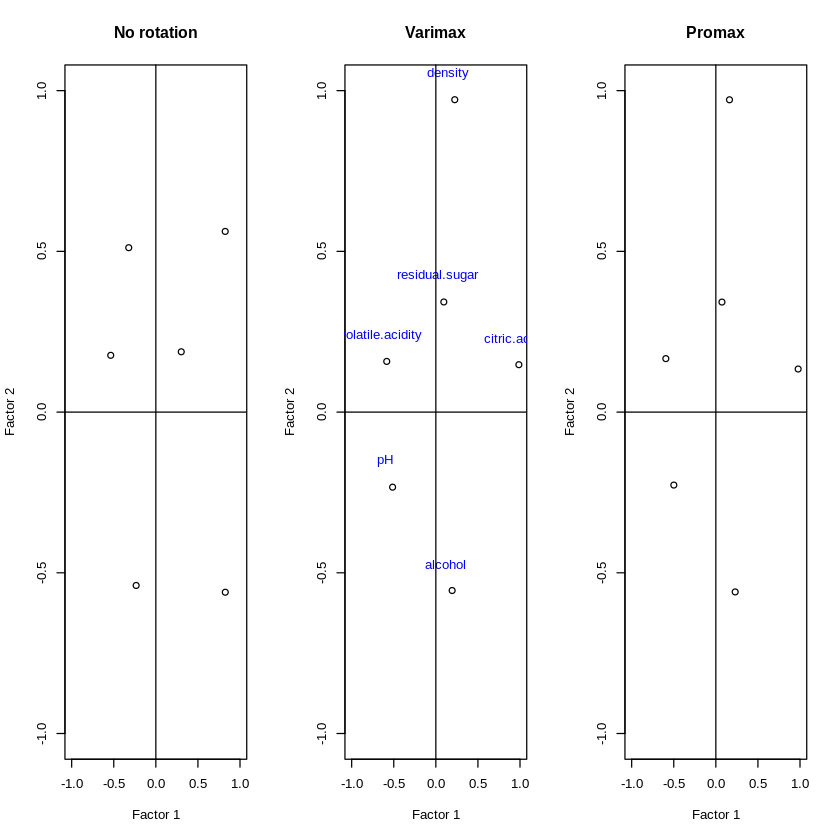

In [73]:
par(mfrow = c(1,3))

#Sin rotacion
plot(wine.fa.none$loadings[,1],wine.fa.none$loadings[,2],
xlab= "Factor 1", ylab= "Factor 2", ylim = c(-1,1), xlim=c(-1,1), main="No rotation")
abline(h = 0, v=0)

#Rotacion varimax
plot(wine.fa.varimax$loadings[,1],wine.fa.varimax$loadings[,2],
xlab= "Factor 1", ylab= "Factor 2", ylim = c(-1,1), xlim=c(-1,1), main="Varimax")
text(wine.fa.varimax$loadings[,1]-0.08, wine.fa.varimax$loadings[,2]+0.08, colnames(wine), col="blue")
abline(h = 0, v=0)

#Rotacion varimax
plot(wine.fa.promax$loadings[,1],wine.fa.promax$loadings[,2],
xlab= "Factor 1", ylab= "Factor 2", ylim = c(-1,1), xlim=c(-1,1), main="Promax")
abline(h = 0, v=0)

**El factor 1** describe características relacionadas a la acidez del vino y por lo tanto a su sabor, la variable citric.acid tiene una influencia fuerte positiva en este factor, por otra parte las variables pH y volatile.acidity tienen un influencia fuerte negativa en el mismo, esto indica que valores más altos de estas variables están asociados a valores más bajos del factor 1, esto sugiere que los vinos asociados con este factor podrían tener un perfil más ácido y fresco, con niveles controlados de acidez volátil, este factor podría nombrarse como "vinos ácidos".




**El factor 2 **describe características de fermentación, dulzura y por consiguiente el sabor del vino, la variable density tiene una influencia fuerte positiva en este factor, la variable alcohol tiene un influencia negativa considerable en el mismo lo que indica que los valores más altos de alcohol estan asociados a valores más bajos del factor 2, esto sugiere que los vinos asociados con este factor podrían tener un perfil más dulce, con un contenido de alcohol más bajo, este factor podría nombrarse como "vinos dulces".